### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('/Users/mvu/anaconda3/UCB-AIML/Practical/5.1/data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.isna()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
(data
 .isna() #check for missing values
 .sum() # convert the boolean to numeric & summarize
 .to_frame() # convert to dataframe
 .rename(columns = {0: "missing_values"})) # rename the column name


,missing_values
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


[Text(0.5, 1.0, 'Missing values in Coupons dataset')]

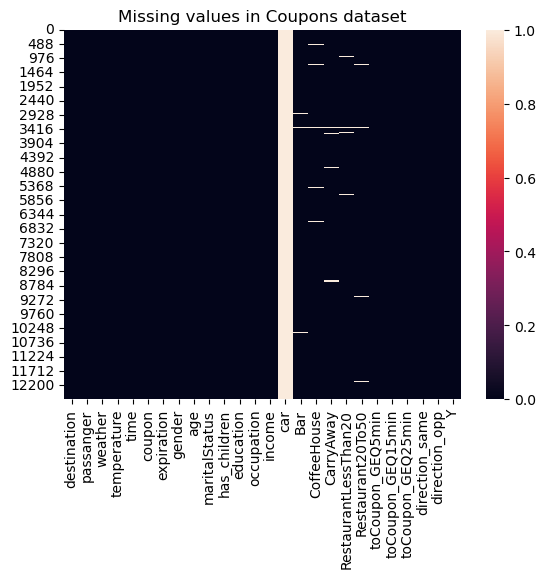

In [6]:
# Visualization of the missing values
sns.heatmap(data.isna()).set(title="Missing values in Coupons dataset")

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
data["expiration"].value_counts()

1d    7091
2h    5593
Name: expiration, dtype: int64

In [8]:
# convert expiration to hours (numerical)
data["expiration"] = data["expiration"].str.replace("1d","24").str.replace("2h","2")
data["expiration"].value_counts()

24    7091
2     5593
Name: expiration, dtype: int64

In [9]:
data["time"].value_counts()

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64

In [10]:
# convert time to military time (numerical)
data["time"] = data["time"].str.replace("6PM","18:00").str.replace("7AM","07:00").str.replace("10AM","10:00").str.replace("2PM","14:00").str.replace("10PM","22:00")
data["time"].value_counts()

18:00    3230
07:00    3164
10:00    2275
14:00    2009
22:00    2006
Name: time, dtype: int64

In [11]:
data["Bar"].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [12]:
# For Bar column, "less1" (meaning has gone to the bar less than 1 time) is the same thing as "never"
data["Bar"] = data["Bar"].str.replace("less1","never")

In [13]:
data["Bar"].value_counts()

never    8679
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [14]:
# to provide more clarity of the variable
data.rename(columns = {"Y": "acceptance"}, inplace=True)
# correct the spelling of passenger column
data.rename(columns = {"passanger": "passenger"}, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passenger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [16]:
data["acceptance"].value_counts()

1    7210
0    5474
Name: acceptance, dtype: int64

In [17]:
accepts = data.query("acceptance == 1")
propAcc = (len(accepts)/len(data["acceptance"]))*100
print(f"ANS: {propAcc}% of the total observations that chose to accept the coupon")

ANS: 56.84326710816777% of the total observations that chose to accept the coupon


5. Use a bar plot to visualize the `coupon` column.

In [18]:
data["coupon"].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

Text(0.5, 1.0, 'Frequency of Coupon Types')

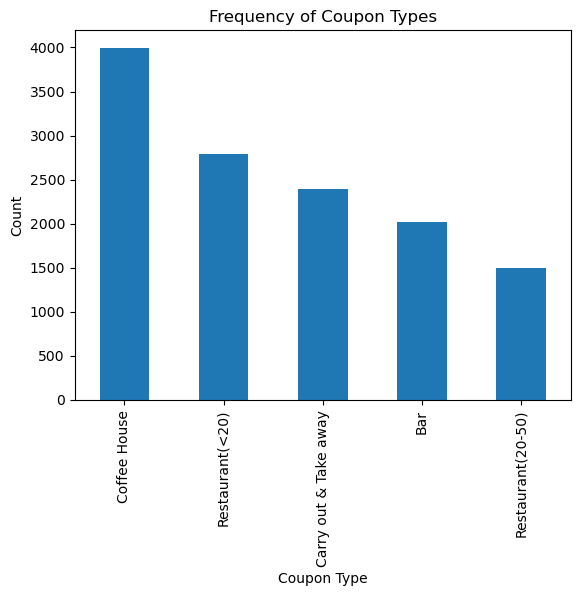

In [19]:
plt = data["coupon"].value_counts().plot(kind="bar")
plt.set_xlabel("Coupon Type")
plt.set_ylabel("Count")
plt.set_title("Frequency of Coupon Types")

6. Use a histogram to visualize the temperature column.

In [20]:
data["temperature"].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

[Text(0.5, 1.0, 'Temperature when Coupon was Recieved')]

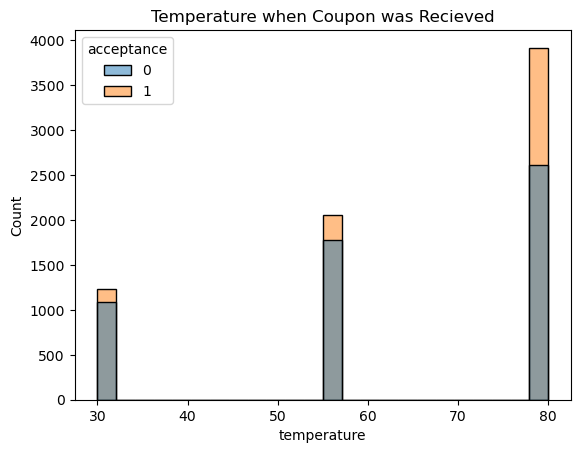

In [21]:
sns.histplot(data=data,x="temperature",hue="acceptance").set(title="Temperature when Coupon was Recieved")

In [22]:
#px.histogram(data, x="temperature",text_auto=True,color="acceptance",title="Temperatures when Coupon was Recieved")

# Bar Coupon Analysis

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [23]:
barCouDF = data.loc[data["coupon"]=="Bar"]
barCouDF.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,acceptance
9,No Urgent Place,Kid(s),Sunny,80,10:00,Bar,24,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,18:00,Bar,24,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,07:00,Bar,24,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10:00,Bar,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,18:00,Bar,24,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [24]:
#barCouAcc = (barCouDF["acceptance"].sum() / len(barCoupDF))*100
#barCouAcc

In [25]:
barCouAccMean = (barCouDF["acceptance"].mean())*100
barCouAccMean

41.00148735746158

In [26]:
print(f"ANS: {barCouAccMean:0.2f}% of the bar coupons were accepted")

ANS: 41.00% of the bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [27]:
data["Bar"].value_counts()

never    8679
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [28]:
bar3orLess = ["never","1~3"]
bar4orMore = ["4~8","gt8"]

#bar3orLessAcc = (barCouDF["Bar"].isin(bar3orLess).mean())*100
#bar4orMoreAcc = (barCouDF["Bar"].isin(bar4orMore).mean())*100

bar3orLessAcc = barCouDF[barCouDF["Bar"].isin(bar3orLess)]["acceptance"]
bar4orMoreAcc = barCouDF[barCouDF["Bar"].isin(bar4orMore)]["acceptance"]

bar3orLessAccRate = bar3orLessAcc.mean()*100
bar4orMoreAccRate = bar4orMoreAcc.mean()*100

print(f"ANS: {bar3orLessAccRate:0.2f}% of the acceptances went to bars 3 or fewer times a month")
print(f"ANS: {bar4orMoreAccRate:0.2f}% of the acceptances went to bars more than 3 times a month")

ANS: 37.06% of the acceptances went to bars 3 or fewer times a month
ANS: 76.88% of the acceptances went to bars more than 3 times a month


## Comparison:
As I would have expected, most of the bar coupon acceptances consists of drivers who would more frequently visit bars in a month. Roughly 76.88% of the acceptances were of drivers that went over 3 times a month, and only 33.66% of the acceptances were drivers that visited bars 3 or fewer times a month. 

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [29]:
data["age"].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [30]:
barMoreThan1 = ["1~3","4~8","gt8"]
ageOver25 = ["26","31","36","41","46","50plus"]
nonBarVisitors = ["never"]
ageUnder25 = ["21","below21"]

barVisitorsOver25Acc = barCouDF[barCouDF["age"].isin(ageOver25) & barCouDF["Bar"].isin(barMoreThan1)]["acceptance"]
#CHECK: barVisitorsOver25
nonBarVisitorsUnder25Acc = barCouDF[barCouDF["age"].isin(ageUnder25) & barCouDF["Bar"].isin(nonBarVisitors)]["acceptance"]
#CHECK: nonBarVisitorsUnder25

barVisitorsOver25AccRate = (barVisitorsOver25Acc.mean())*100
nonBarVisitorsUnder25AccRate = (nonBarVisitorsUnder25Acc.mean())*100

print(f"{barVisitorsOver25AccRate:0.2f}% are drivers who have visited bars & over the age of 25 that accepted.")
print(f"{nonBarVisitorsUnder25AccRate:0.2f}% are drivers who never visit bars & under the age of 25 that accepted.")

69.52% are drivers who have visited bars & over the age of 25 that accepted.
39.45% are drivers who never visit bars & under the age of 25 that accepted.


## Comparison:
Out of the drivers that accepted the bar coupon, 69.52% of the drivers had previously visited a bar at least once in a month and is over 25 years old. Whereas those that are under 25 years old and had never visited a bar prior made up about 28.50%. 

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [31]:
barCouDF["passenger"].value_counts()

Alone        1200
Friend(s)     337
Partner       274
Kid(s)        206
Name: passenger, dtype: int64

In [32]:
barMoreThan1 = ["1~3","4~8","gt8"]
noKidPass = ["Alone","Friend(s)","Partner"]
occFarm = ["Farming Fishing & Forestry"]

barNoKidNoFarmAcc = barCouDF[barCouDF["Bar"].isin(barMoreThan1) & barCouDF["passenger"].isin(noKidPass) & ~barCouDF["occupation"].isin(occFarm)]["acceptance"]
#CHECK: barNoKidNoFarm["occupation"].value_counts()

barNoKidNoFarmAccRate = (barNoKidNoFarmAcc.mean())*100

print(f"{barNoKidNoFarmAccRate:0.2f}% of drivers have visited a bar at least once a month, no kid passengers, and not in a farming, fishing, or forestry occupation")


71.32% of drivers have visited a bar at least once a month, no kid passengers, and not in a farming, fishing, or forestry occupation


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [35]:
barCouDF["maritalStatus"].value_counts()

Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: maritalStatus, dtype: int64

In [35]:
barCouDF["maritalStatus"].value_counts()

Married partner      882
Single               661
Unmarried partner    378
Divorced              75
Widowed               21
Name: maritalStatus, dtype: int64

In [51]:
barCouDF["RestaurantLessThan20"].value_counts()

1~3      878
4~8      568
less1    325
gt8      186
never     37
Name: RestaurantLessThan20, dtype: int64

In [50]:
barCouDF["income"].value_counts()

$25000 - $37499     318
$100000 or More     291
$12500 - $24999     288
$37500 - $49999     267
$50000 - $62499     262
Less than $12500    165
$75000 - $87499     151
$87500 - $99999     145
$62500 - $74999     130
Name: income, dtype: int64

In [56]:
# 6a) go to bars more than once a month, had passengers that were not a kid, and were not widowed
nonBarVisitor = ["never"]
kidPass = ["Kid(s)"]
widowed = ["Widowed"]

barNoKidNotWidowedAcc = barCouDF[(~barCouDF["Bar"].isin(nonBarVisitor))& (~barCouDF["passenger"].isin(kidPass)) & (~barCouDF["maritalStatus"].isin(widowed))]["acceptance"]
barNoKidNotWidowedAccRate = barNoKidNotWidowedAcc.mean()*100
#barNoKidNotWidowedAccRate

#6b) go to bars more than once a month and are under the age of 30
ageUnder30 = ["26","21","below21"]

barUnder30Acc = barCouDF[(~barCouDF["Bar"].isin(nonBarVisitor))& (barCouDF["age"].isin(ageUnder30))]["acceptance"]
barUnder30AccRate = barUnder30Acc.mean()*100
#barUnder30AccRate

#6c) go to cheap restaurants more than 4 times a month and income is less than 50K
cheapRestMoreThan4 = ["4~8","gt8"]
incomeLower50k = ["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999"]

cheapRest4IncomeUnd50kAcc = barCouDF[barCouDF["RestaurantLessThan20"].isin(cheapRestMoreThan4) & barCouDF["income"].isin(incomeLower50k)]["acceptance"]
cheapRest4IncomeUnd50kAccRate = cheapRest4IncomeUnd50kAcc.mean()*100
#cheapRest4IncomeUnd50kAccRate

print(f"{barNoKidNotWidowedAccRate:0.2f}% of the drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed")
print(f"{barUnder30AccRate:0.2f}% of the drivers go to bars more than once a month and are under the age of 30")
print(f"{cheapRest4IncomeUnd50kAccRate:0.2f}% of the drivers go to cheap restaurants more than 4 times a month and income is less than 50K")


70.30% of the drivers go to bars more than once a month, had passengers that were not a kid, and were not widowed
72.21% of the drivers go to bars more than once a month and are under the age of 30
45.35% of the drivers go to cheap restaurants more than 4 times a month and income is less than 50K


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Bar Coupon Conclusions
- The highest acceptance rates are drivers who:
    1. **Frequency of bar visits**: Go to bars more than once a month
    2. **Passenger**: Have no kid passengers
    3. **Age**: Under the age of 30
    4. **Marital status**: Not widowed

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Coffee Coupon Analysis

In [57]:
coffeeCouDF = data[data["coupon"] == "Coffee House"]

In [58]:
coffeeCouDF.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,acceptance
1,No Urgent Place,Friend(s),Sunny,80,10:00,Coffee House,2,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,14:00,Coffee House,2,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,14:00,Coffee House,24,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,18:00,Coffee House,2,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,18:00,Coffee House,2,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [ ]:
coffeeCouDFAccRate = coffeeCouDF["acceptance"].mean()
coffeeCouDFAccRate

print(f"{coffeeCouDFAccRate:0.2f}% of drivers accepted the Coffee House coupon")

0.50% of drivers accepted the Coffee House coupon


In [59]:
coffeeCouDF["destination"].value_counts()

No Urgent Place    2155
Home                928
Work                913
Name: destination, dtype: int64

[Text(0.5, 1.0, 'Coffee Coupon Acceptances by Destination & Age')]

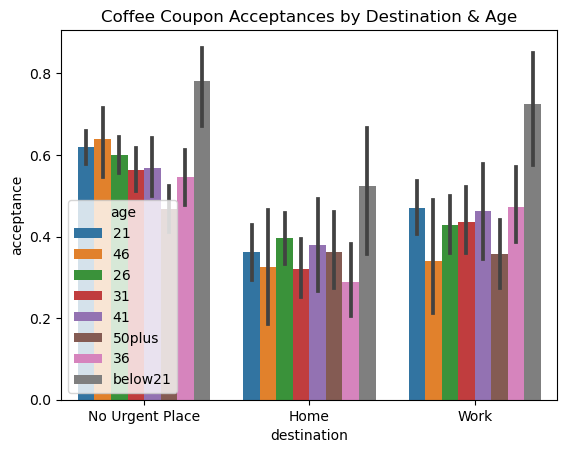

In [76]:
sns.barplot(data=coffeeCouDF, x="destination",y="acceptance",hue="age").set(title="Coffee Coupon Acceptances by Destination & Age")

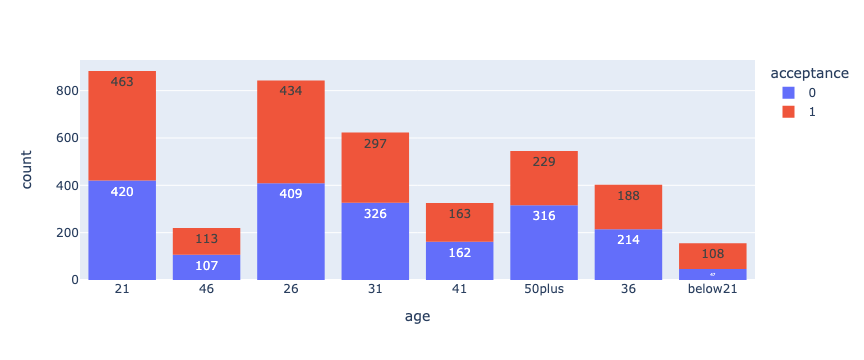

In [123]:
px.histogram(coffeeCouDF,x="age",color="acceptance",text_auto=True)

Based off of these two plots above, drivers who had no urgent place to be tended to accept the coffee coupon the most. More specifically, those under the age of 21 accepted the coupon more frequently.

In [82]:
coffeeCouDF["temperature"].value_counts()

80    2401
55    1277
30     318
Name: temperature, dtype: int64

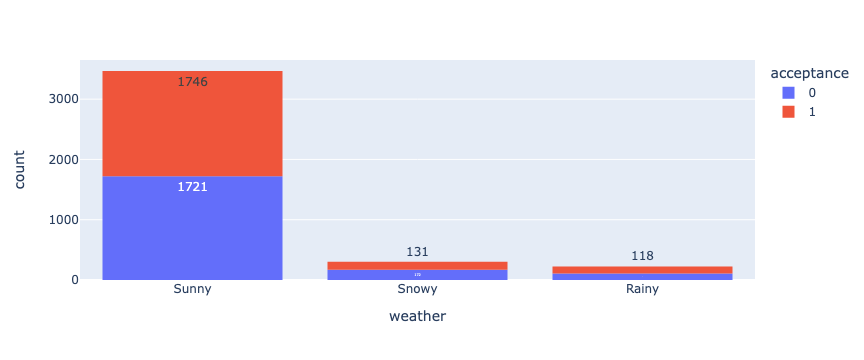

In [124]:
px.histogram(coffeeCouDF,x="weather",color="acceptance",text_auto=True)

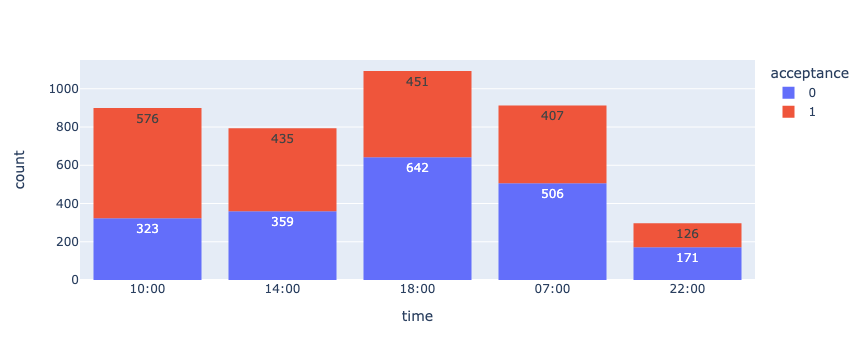

In [157]:
px.histogram(coffeeCouDF,x="time",color="acceptance",text_auto=True)

In [161]:
beforeNoon = ["07:00","10:00"]
sunnyWeather = ["Sunny"]
noUrgPlace = ["No Urgent Place"]

coffeeCouDFRate = coffeeCouDF[coffeeCouDF["time"].isin(beforeNoon) & coffeeCouDF["weather"].isin(sunnyWeather) & coffeeCouDF["destination"].isin(noUrgPlace)]["acceptance"]
coffeeCouDFRateAcc = coffeeCouDFRate.mean()*100

print(f"{coffeeCouDFRateAcc:0.2f}% of the drivers that accepted the coffee coupon before noon on a sunny day with no urgent destination")

63.65% of the drivers that accepted the coffee coupon before noon on a sunny day with no urgent destination


In [141]:
# What is the acceptance rate of drivers accepting the coffee coupon under 35 on a sunny day with no urgent destination?
ageUnder35 = ["below21","21","26","31"]
sunnyWeather = ["Sunny"]
noUrgPlace = ["No Urgent Place"]

coffeeCouDFRate = coffeeCouDF[coffeeCouDF["weather"].isin(sunnyWeather) & coffeeCouDF["age"].isin(ageUnder35) & coffeeCouDF["destination"].isin(noUrgPlace)]["acceptance"]
coffeeCouDFRateAcc = coffeeCouDFRate.mean()*100

print(f"{coffeeCouDFRateAcc:0.2f}% of the drivers that accepted the coffee coupon on a sunny day were under 35 with no urgent destination")

60.27% of the drivers that accepted the coffee coupon on a sunny day were under 35 with no urgent destination


This data highlighting the weather of when the coupon was sent had far more traffic on a sunny day.

In [117]:
occuRate = coffeeCouDF.groupby("occupation")["acceptance"].mean().to_frame()
occuRate["acceptance"] = (occuRate["acceptance"]*100).round(2)
occuRate["acceptance"].sort_values()

occupation
Community & Social Services                  35.14
Production Occupations                       35.71
Legal                                        37.68
Sales & Related                              39.15
Retired                                      40.24
Office & Administrative Support              43.15
Education&Training&Library                   43.58
Food Preparation & Serving Related           44.58
Protective Service                           44.83
Management                                   45.64
Life Physical Social Science                 47.54
Construction & Extraction                    47.83
Business & Financial                         47.95
Personal Care & Service                      50.00
Computer & Mathematical                      50.33
Arts Design Entertainment Sports & Media     50.72
Unemployed                                   54.21
Farming Fishing & Forestry                   54.55
Architecture & Engineering                   55.56
Installation Mainten

In [ ]:
coffeeCouDF["CoffeeHouse"].value_counts()

less1    1075
1~3      1042
never     927
4~8       538
gt8       342
Name: CoffeeHouse, dtype: int64

In [142]:
coffeeCouDF["maritalStatus"].value_counts()

Single               1550
Married partner      1541
Unmarried partner     717
Divorced              151
Widowed                37
Name: maritalStatus, dtype: int64

In [152]:
# What is the acceptance rate of drivers accepting the coffee coupon a healthcare worker and single?
healthCareOcc = ["Healthcare Practitioners & Technical"]
single = ["Single"]

healthSingleAcc = coffeeCouDF[coffeeCouDF["occupation"].isin(healthCareOcc) & coffeeCouDF["maritalStatus"].isin(single)]["acceptance"]
healthSingleAccRate = healthSingleAcc.mean()*100

print(f"{healthSingleAccRate:0.2f}% of the drivers that accepted the coffee coupon were health care workers and single")

84.62% of the drivers that accepted the coffee coupon were health care workers and single


## Coffee House Conclusions
- The highest acceptances for drivers:
    1. **Age**: Under the age of 21
    2. **Destination**: No urgent place set
    3. **Weather**: Sunny
    4. **Occupation**: 
        a. Student
        b. Building & Grounds Cleaning & Maintenance
        c. Healthcare Practitioners & Technical 
    5. **Time**: Before noon